In [1]:
#@author: Gowtham Vuppala
#UBID: 50320157

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
def normalize_data(X_train, X_val, X_test):
    """This function normalizes the data.

    Args:
        X_train: The features of the training set.
        X_val: The features of the cross-validation set.
        X_test: The features of the test set

    Returns:
        The normalized datasets

    """
    #Use the mean of only training and validation set to normalize data
    scaler = StandardScaler()
    tmp = np.concatenate((X_train, X_test), axis=0)
    tmp = scaler.fit_transform(tmp)
    X_train = scaler.transform(X_train)
    X_val  = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    return X_train, X_val, X_test


In [3]:
def init_weights(fea):
    """This function initializes the starting weights as zeroes.

    Args:
        fea: The number of features
    Returns:
        The zero initialized weights: w and b

    """
    w = np.zeros((fea, 1))
    b = 0
    return w, b

In [4]:

def sigmoid(z):
    """This function performs sigmoid function for the  output of the 
    basis function on every single example.

    Args:
        z: The results of the basis function
    Returns:
        The output after applying basis function

    """
    a = 1 / (1 + np.exp(-z))
    return a

In [5]:
def model(X_train, y_train, w, b, learning_rate, epochs, X_val, y_val):
    """This function performs logistic regression on the input data using 
    Cross Entropy loss function and gradient descent optimizer.

    Args:
        X_train: The training dataset
        y_train: The output for the training dataset
        w: The initial weights
        b: The initial bias
        learning_rate: The learning rate for gradient descent
        epochs: The number of iterations to update the weights
        X_val: The cross-validation dataset
        y_val: The outputs for cross-validation dataset
    Returns:
        w and b: The final weights and bias.
        Lists containing accuracies for each iteration for both training and validation datasets. 

    """
    #Convert shape of y_train from (m, ) to (m, 1)
    y_train = y_train.reshape(y_train.shape[0],1)
    y_val = y_val.reshape(y_val.shape[0], 1)
    losses, losses_val, accuracies, accuracies_val = [], [], [], []
    
    #Iterate over the number of epochs
    for i in range(epochs):
        m = X_train.shape[0] #Number of examples
        z = np.dot(X_train, w) + b
        #print(z.shape)
        a = sigmoid(z)
        
        #Cross-Entropy loss function
        L = -1/m * np.sum(y_train * np.log(a) +  (1 - y_train) * (np.log(1 - a)))
        losses.append(L)
        
        #Calculate loss on Validation set
        z1 = np.dot(X_val, w) + b
        a_val = sigmoid(z1)
        L2 = -1/(X_val.shape[0]) * np.sum(y_val * np.log(a_val) +  (1 - y_val) * (np.log(1 - a_val)))
        losses_val.append(L2)
        
        
        #Perform gradient descent to update weights
        dw = -1/m * np.dot(X_train.T, (y_train - a))
        db = -1/m * np.sum(y_train - a)
        #print(dw, db)  
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        #Predict and validate accuracy using the current weights at epoch i
        tn, fp, fn, tp = predict(a, y_train)
        accuracy = (tn + tp)/(tn + fp + fn + tp)
        accuracies.append(accuracy)     
        
        #Test on cross validation data
        tn1, fp1, fn1, tp1 = predict(a_val, y_val)
        accuracy_val = (tn1 + tp1)/(tn1 + fp1 + fn1 + tp1)
        accuracies_val.append(accuracy_val)
        
        if (i+1)%100 == 0:
            print('After ', i+1, ' epochs, loss: ', L ,'accuracy: ', accuracy,
              'cross_validation loss: ', L2 , 'cross_validation accuracy: ', accuracy_val)
          
    return w, b, losses, losses_val, accuracies, accuracies_val

In [6]:
def predict(y_pred, y_true):
    """This function predicts the output and creates a confusion matrix.

    Args:
        y_pred: The values to be predicted
        y_true: The correct output values
    Returns:
        True Negative, False Positive, False Negative, True Positive

    """
    #Convert the predicted values as 0 or 1 based on the threshold
    y_pred = [1 if i > 0.5 else 0 for i in y_pred]
    #Get the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_pred, y_true).ravel()
    return tn, fp, fn, tp

In [7]:
def plot_graph(X1, Y1, Y2, Xlabel, Ylabel):
    """This function plots the graph for the given X1 and Y1.

    Args:
        X1: The X-axis values
        Y1: The Y-axis values
        title: The tile of the graph
        Xlabel: The label of X-axis
        Ylabel: The label of Y-axis
    """
    plt.figure(figsize=(10,3))
    
    plt.subplot(1, 2, 1)
    plt.plot(X1, Y1, color='blue')
    plt.xlabel(Xlabel)
    plt.ylabel('Training ' + Ylabel)
    
    plt.subplot(1, 2, 2)
    plt.plot(X1, Y2, color='green')
    plt.xlabel(Xlabel)
    plt.ylabel('Cross-Validation ' + Ylabel)
    
   
    plt.show()

After  100  epochs, loss:  0.25655228274579545 accuracy:  0.9516483516483516 cross_validation loss:  0.2566315280817868 cross_validation accuracy:  0.9473684210526315
After  200  epochs, loss:  0.19276180574025661 accuracy:  0.9648351648351648 cross_validation loss:  0.19194344357157803 cross_validation accuracy:  0.9473684210526315
After  300  epochs, loss:  0.16390739547520009 accuracy:  0.967032967032967 cross_validation loss:  0.16297417554873544 cross_validation accuracy:  0.9649122807017544
After  400  epochs, loss:  0.14680040637417996 accuracy:  0.967032967032967 cross_validation loss:  0.1460006328794533 cross_validation accuracy:  0.9649122807017544
After  500  epochs, loss:  0.13522992957180818 accuracy:  0.9692307692307692 cross_validation loss:  0.13469016579362703 cross_validation accuracy:  0.9649122807017544
After  600  epochs, loss:  0.12675790721885533 accuracy:  0.9736263736263736 cross_validation loss:  0.12655420021658287 cross_validation accuracy:  0.9649122807017

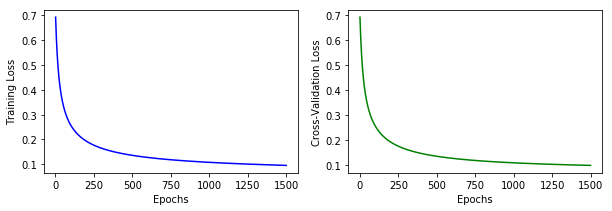

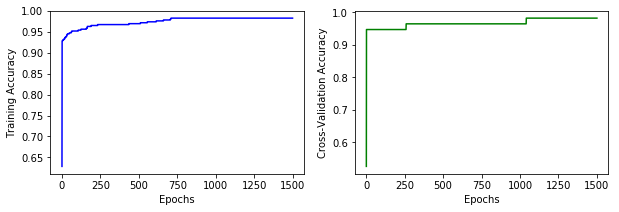

In [8]:
if __name__ == '__main__':
    data  = pd.read_csv('wdbc.csv', header=None)
    #print(data.head, data.shape)
    
    #Remove the first column
    data = data.loc[:, 1:32]
    #Convert labels into numeric type
    data[1] = data[1].map({'M': 1, 'B': 0})
    data = np.array(data)
    
    #Split into features and labels
    X = data[:, 1:32]
    y = data[:, 0]
    #print(X.head, X.shape)
    #print(y.head, y.shape)
    
    #Split into training. cross-validation and test sets(80, 10, 10)
    X_train, Xtemp, y_train, ytemp  = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=42)
    #print(X_train.shape, X_test.shape, type(y_train), y_test.shape)
    #print(X_val.shape, X_test.shape, y_val.shape, y_test.shape)
    
    #Normalize data
    X_train, X_val, X_test = normalize_data(X_train, X_val, X_test)
    
    learning_rate = 0.01
    epochs = 1500
    
    #Initialize weights and perform logistic regression for given no. of epochs
    w, b = init_weights(X_train.shape[1])
    w, b, losses, losses_val, accuracies, accuracies_val = model(X_train, y_train, w, b, learning_rate, epochs, X_val, y_val)
    #print(w, b)
    
    #Test on the test dataset using the trained weights
    a_val = sigmoid(np.dot(X_test, w) + b)   
    tn2, fp2, fn2, tp2 = predict(sigmoid(np.dot(X_test, w) + b), y_test)
    accuracy_test = (tn2 + tp2) / (tn2 + fp2 + fn2 + tp2)
    precision_test = tp2 / (tp2 + fp2)
    recall_test = tp2 / (tp2 + fn2)
    print('Accuracy for Test set: ', accuracy_test)
    print('Precision for Test set: ', precision_test)
    print('Recall for Test set: ', recall_test)
    
    #Plot the results
    epochs = [i for i in range(1, epochs+1)]
    plot_graph(epochs, losses, losses_val, 'Epochs', 'Loss')
    plot_graph(epochs, accuracies, accuracies_val, 'Epochs', 'Accuracy')   